deployment 01_2014
C:\Users\sa01ld\m_moorproc_toolbox\exec\gitrepo\export_Oceansites\oceansites_format\rteb1_01_2014_MCAT.nc
 data from this deployment are saved at X:\Marphys_Archive\Data\OSNAP\THREDDS_DATA\Rockall_Trough_mooring_RTEB1_stacked_time_series_TSUV_201407_202207_v0.nc
deployment 02_2015
C:\Users\sa01ld\m_moorproc_toolbox\exec\gitrepo\export_Oceansites\oceansites_format\rteb1_02_2015_MCAT.nc
 data from this deployment are saved at X:\Marphys_Archive\Data\OSNAP\THREDDS_DATA\Rockall_Trough_mooring_RTEB1_stacked_time_series_TSUV_201407_202207_v0.nc
deployment 03_2016
C:\Users\sa01ld\m_moorproc_toolbox\exec\gitrepo\export_Oceansites\oceansites_format\rteb1_03_2016_MCAT.nc
 data from this deployment are saved at X:\Marphys_Archive\Data\OSNAP\THREDDS_DATA\Rockall_Trough_mooring_RTEB1_stacked_time_series_TSUV_201407_202207_v0.nc
deployment 04_2017
C:\Users\sa01ld\m_moorproc_toolbox\exec\gitrepo\export_Oceansites\oceansites_format\rteb1_04_2017_MCAT.nc
 data from this deployment ar

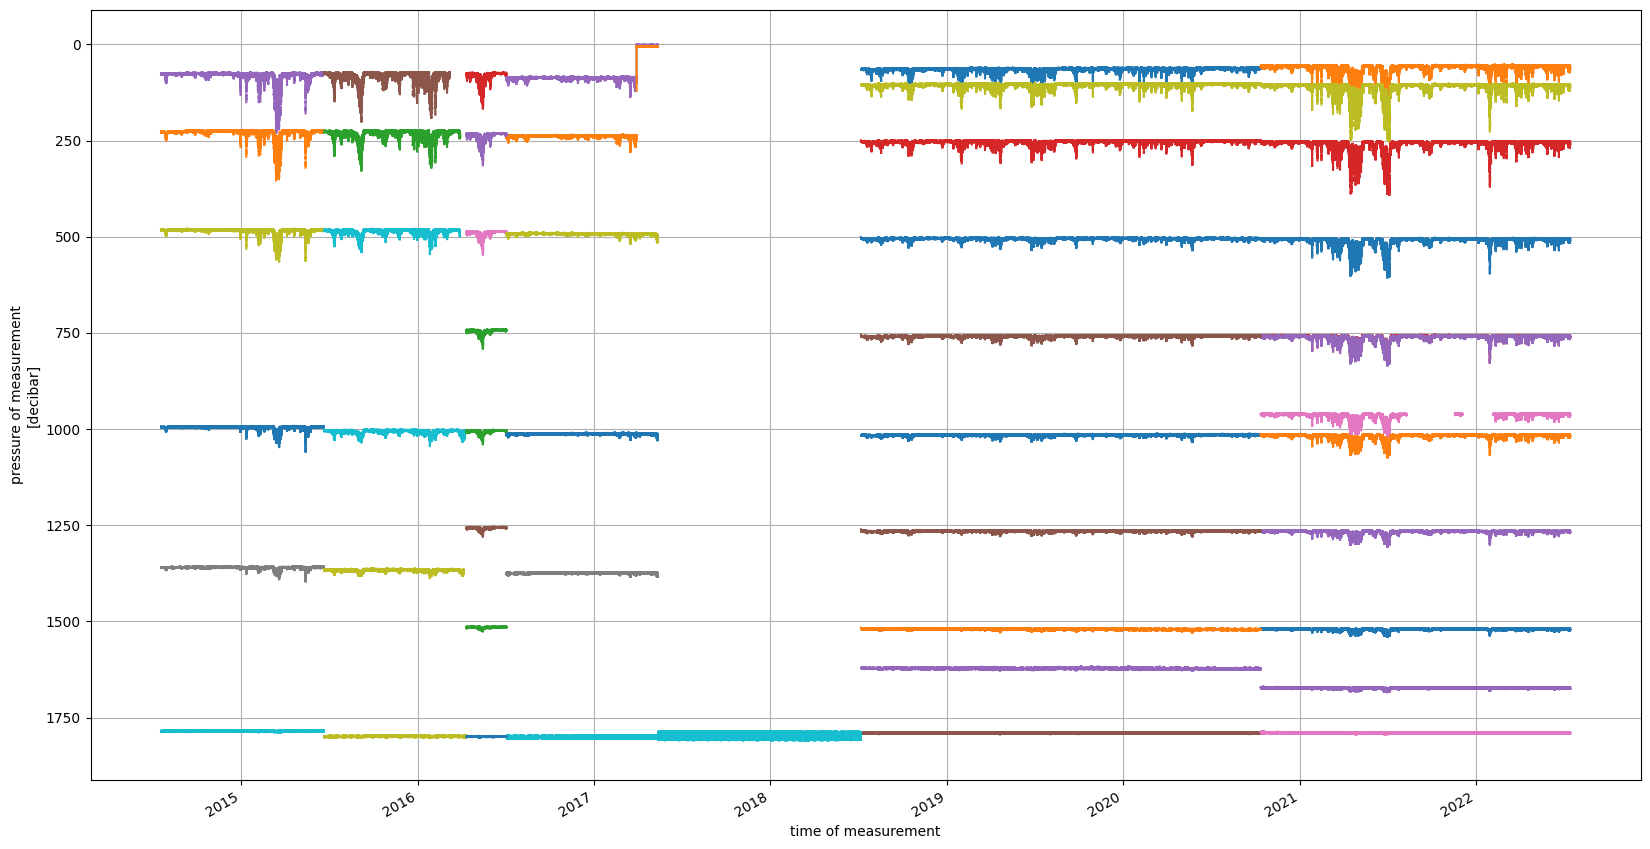

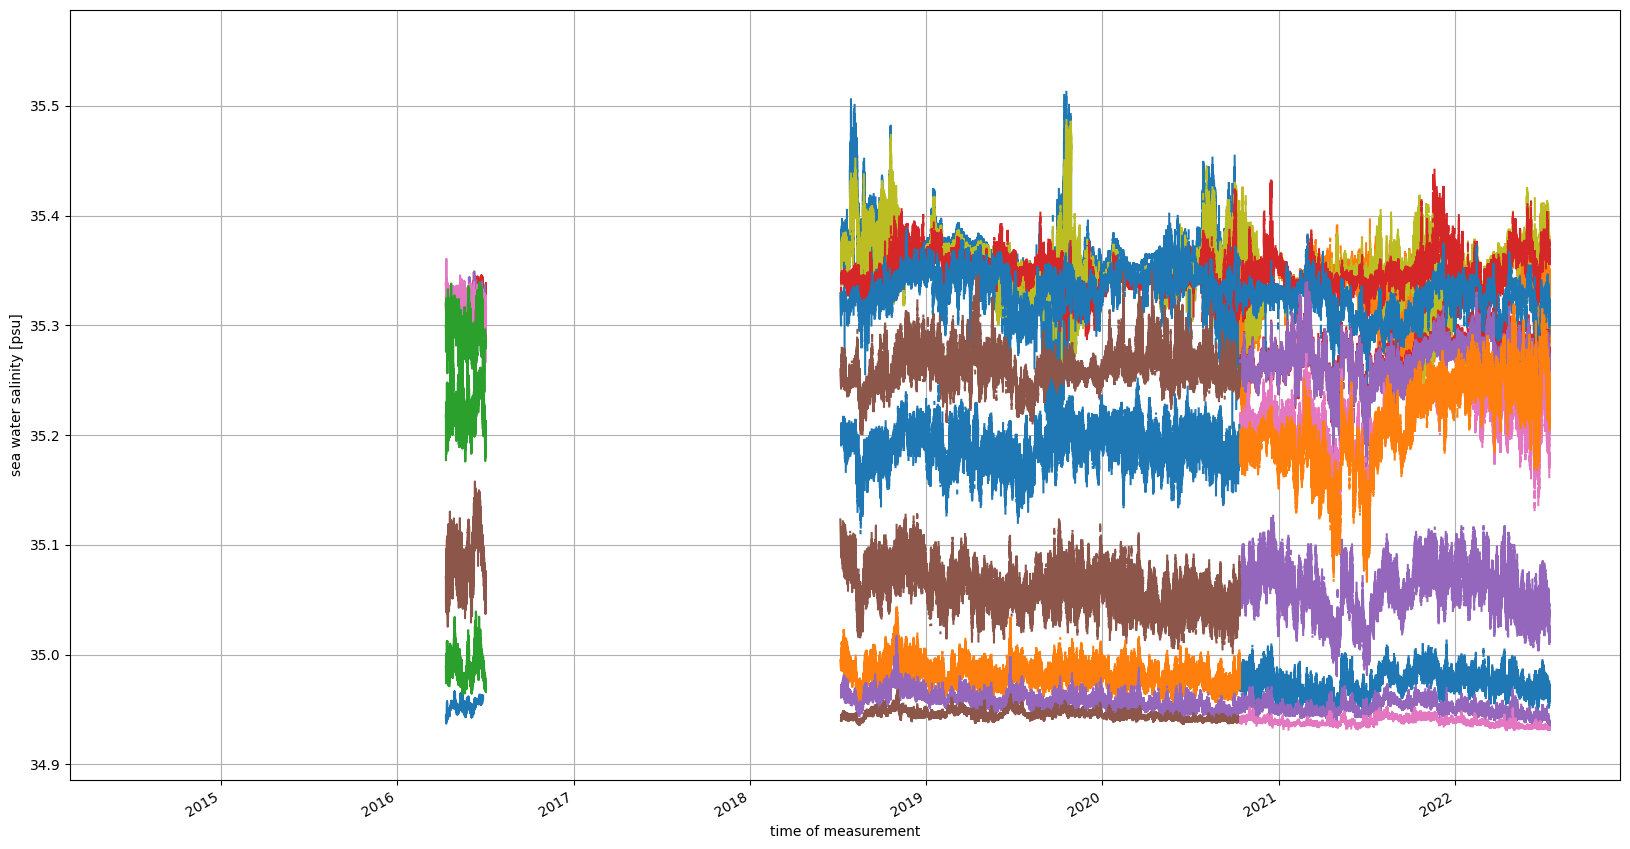

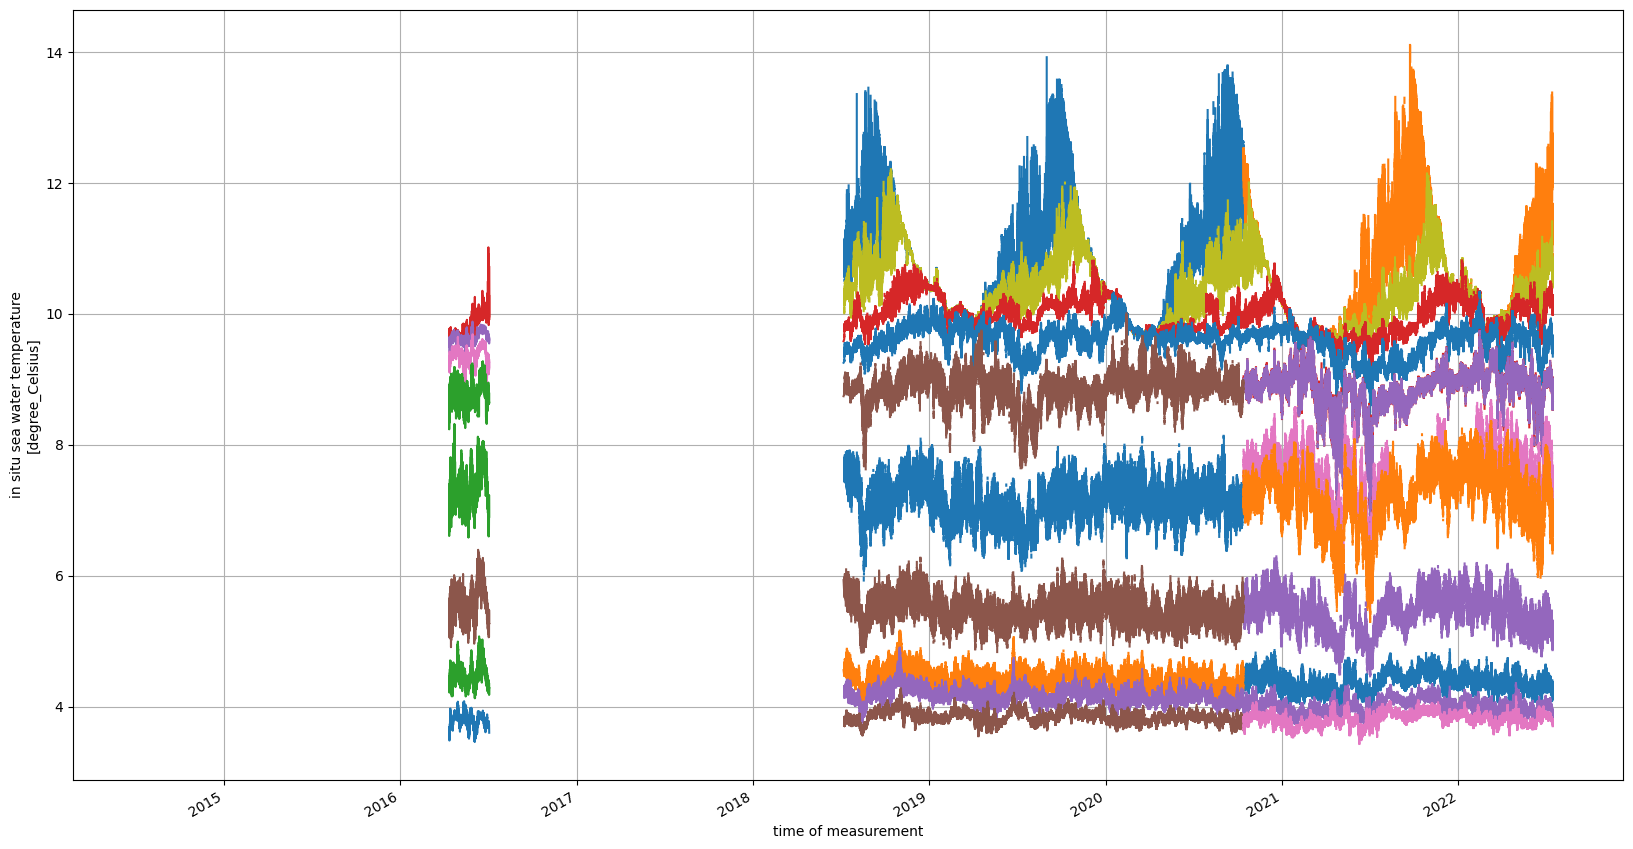

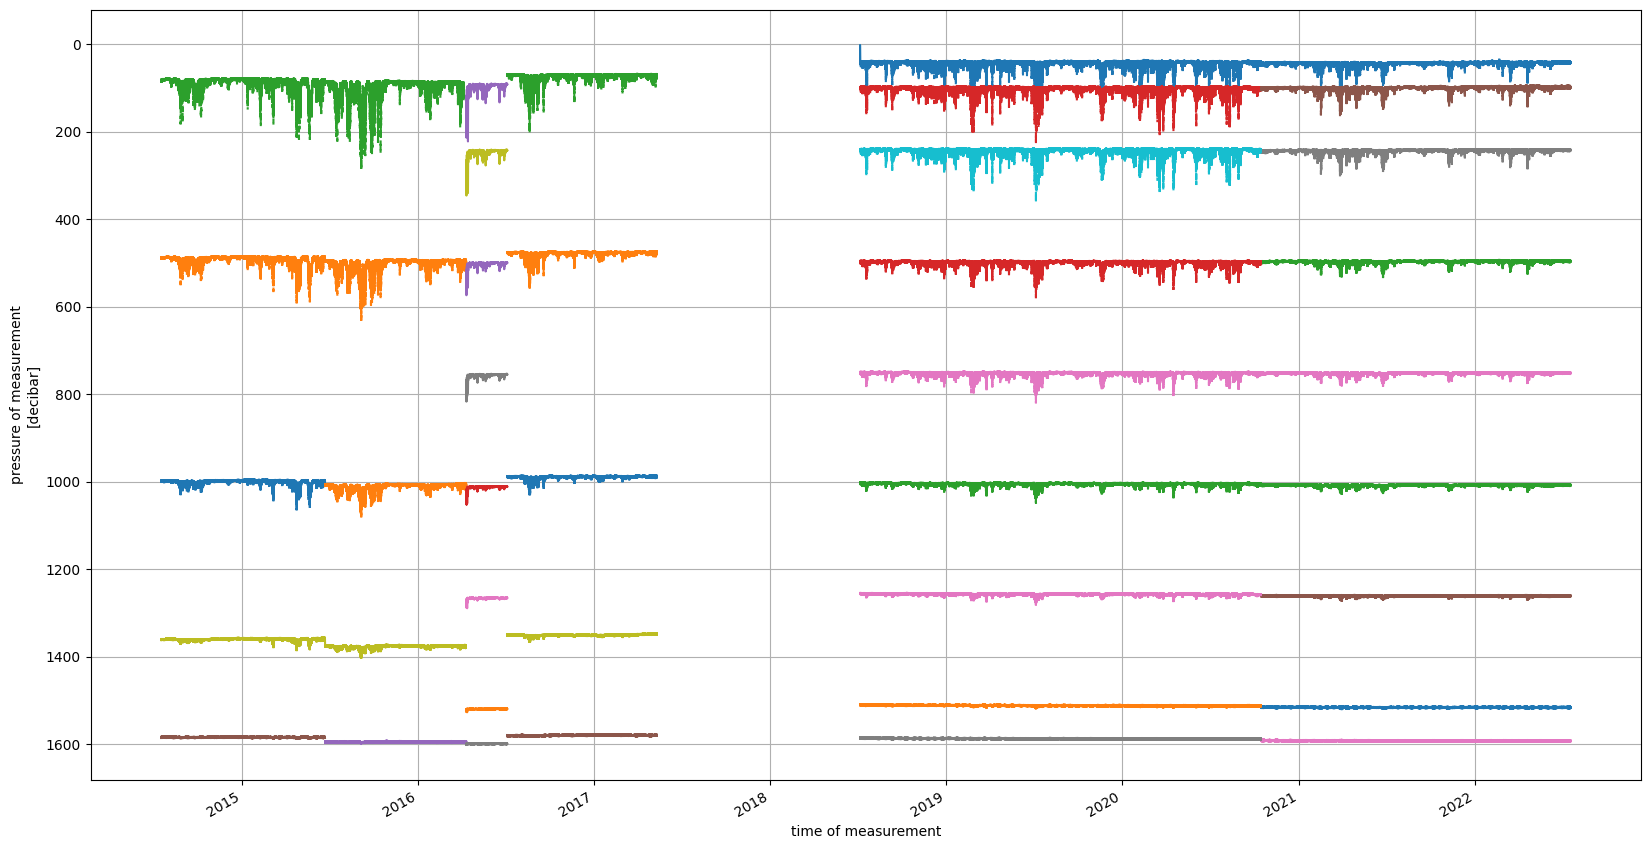

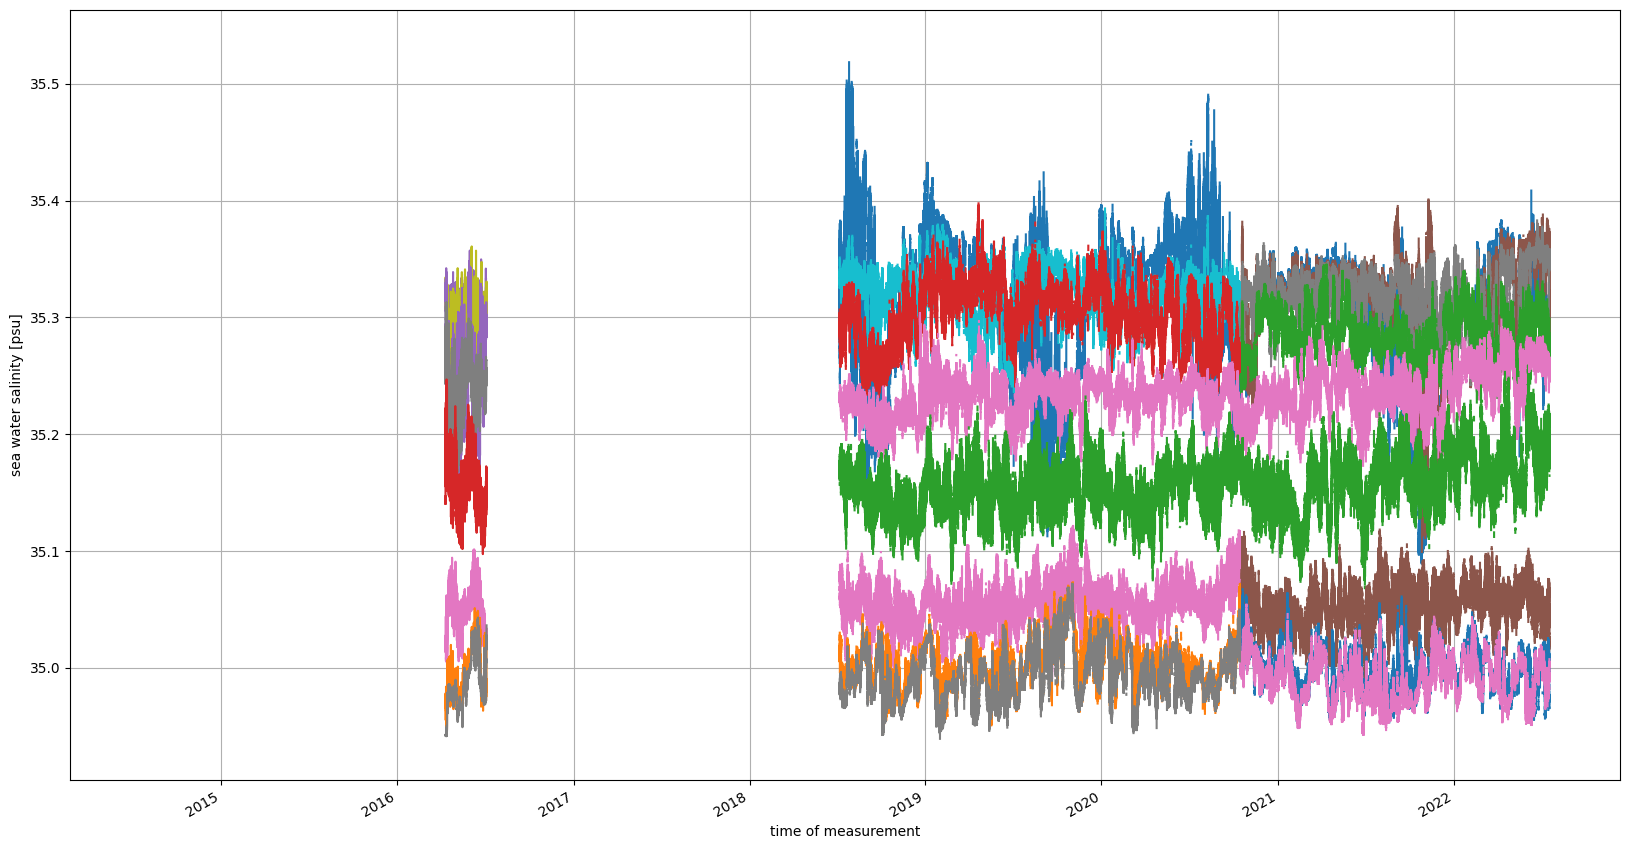

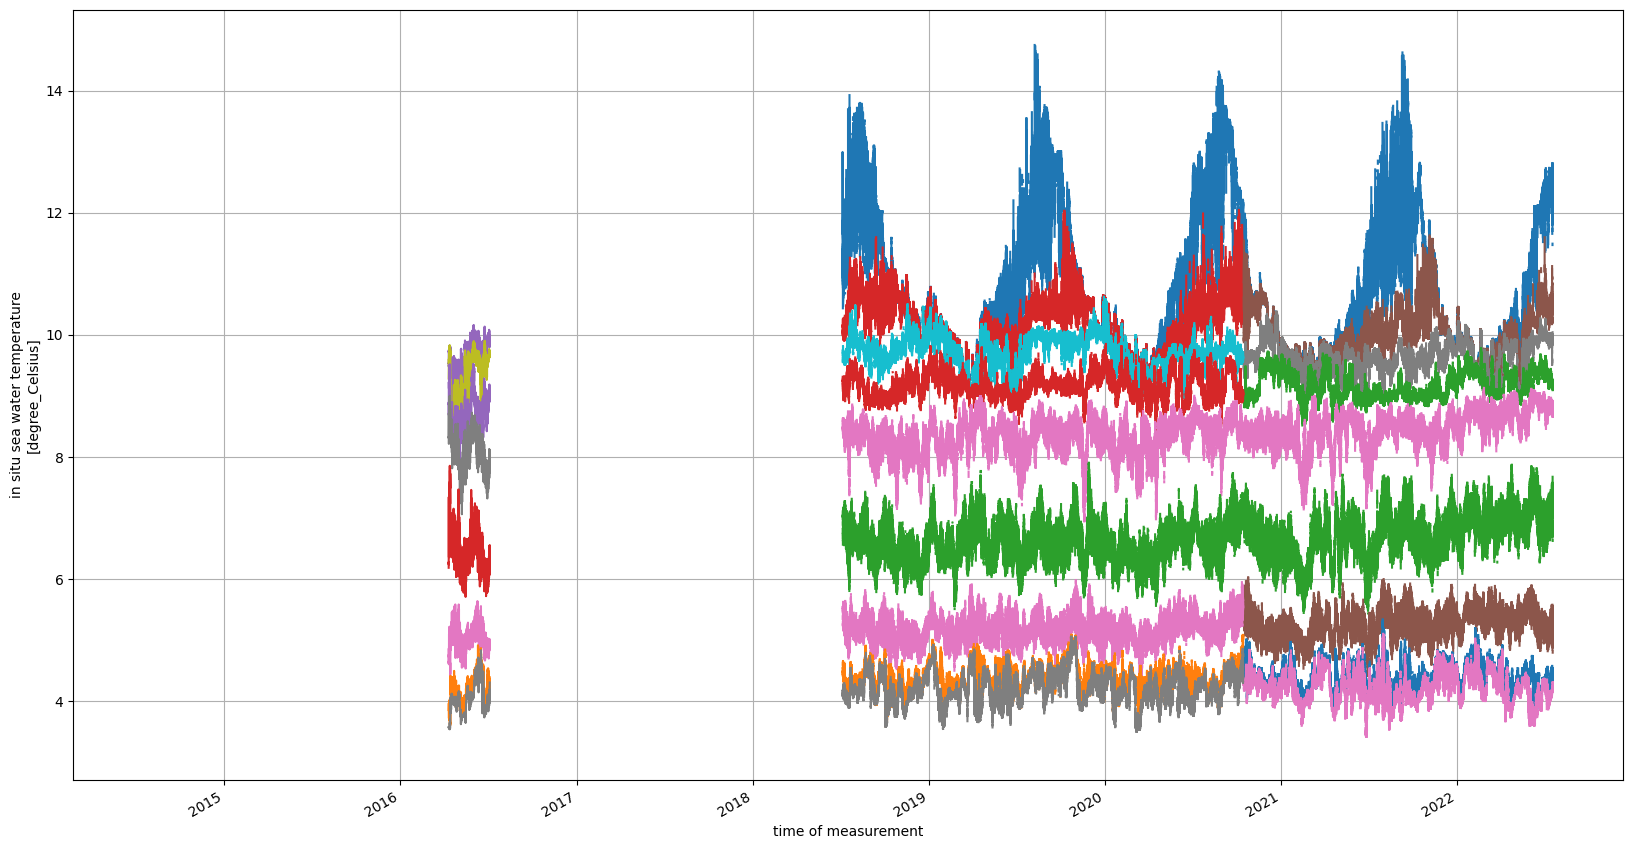

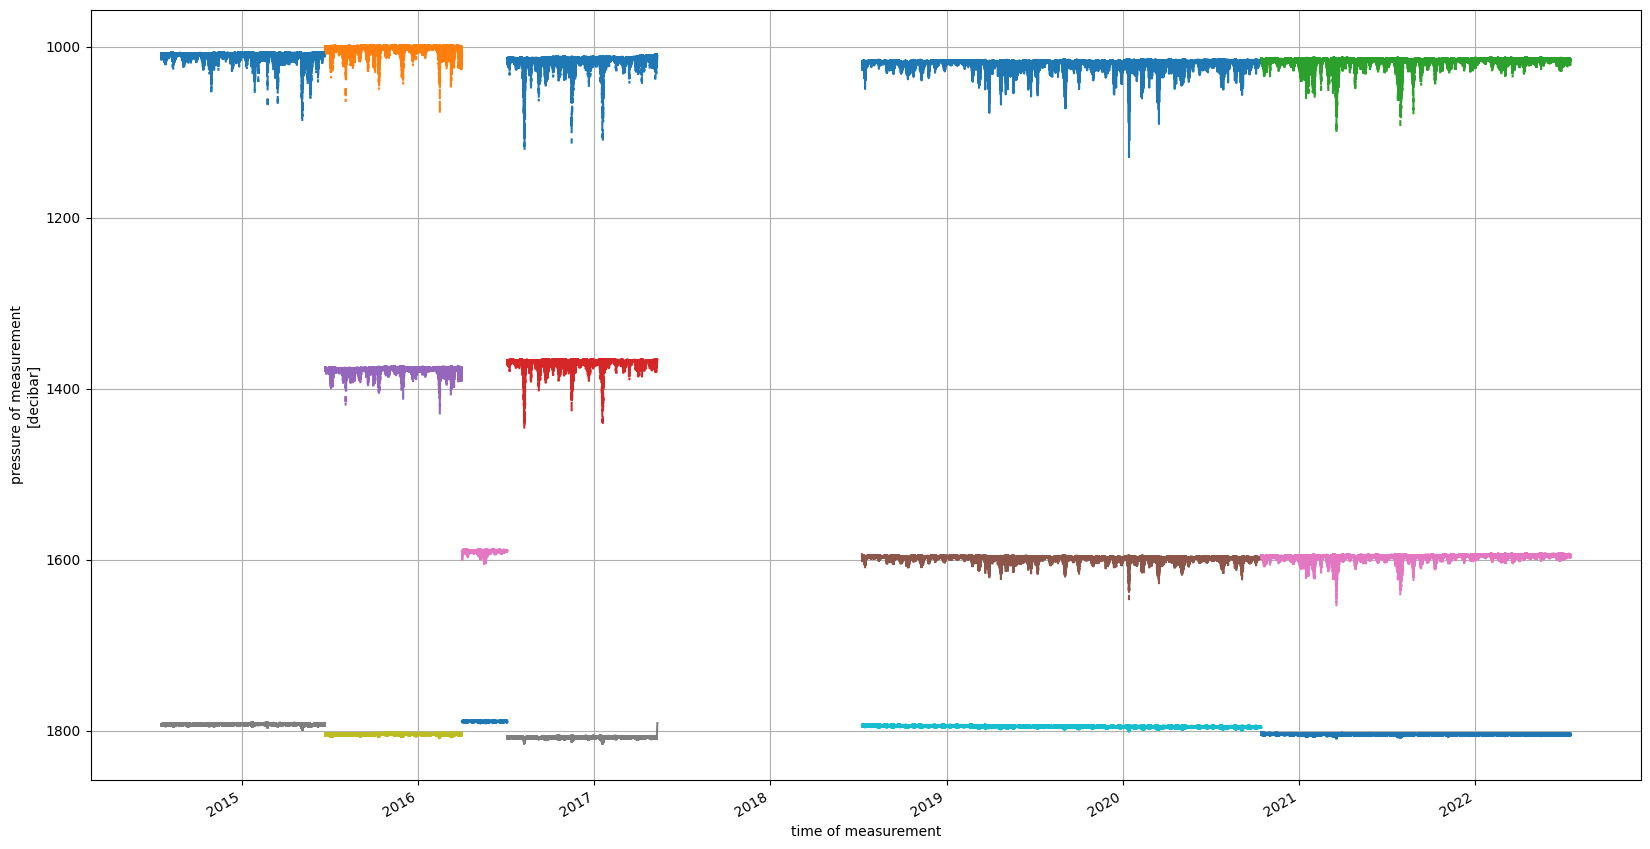

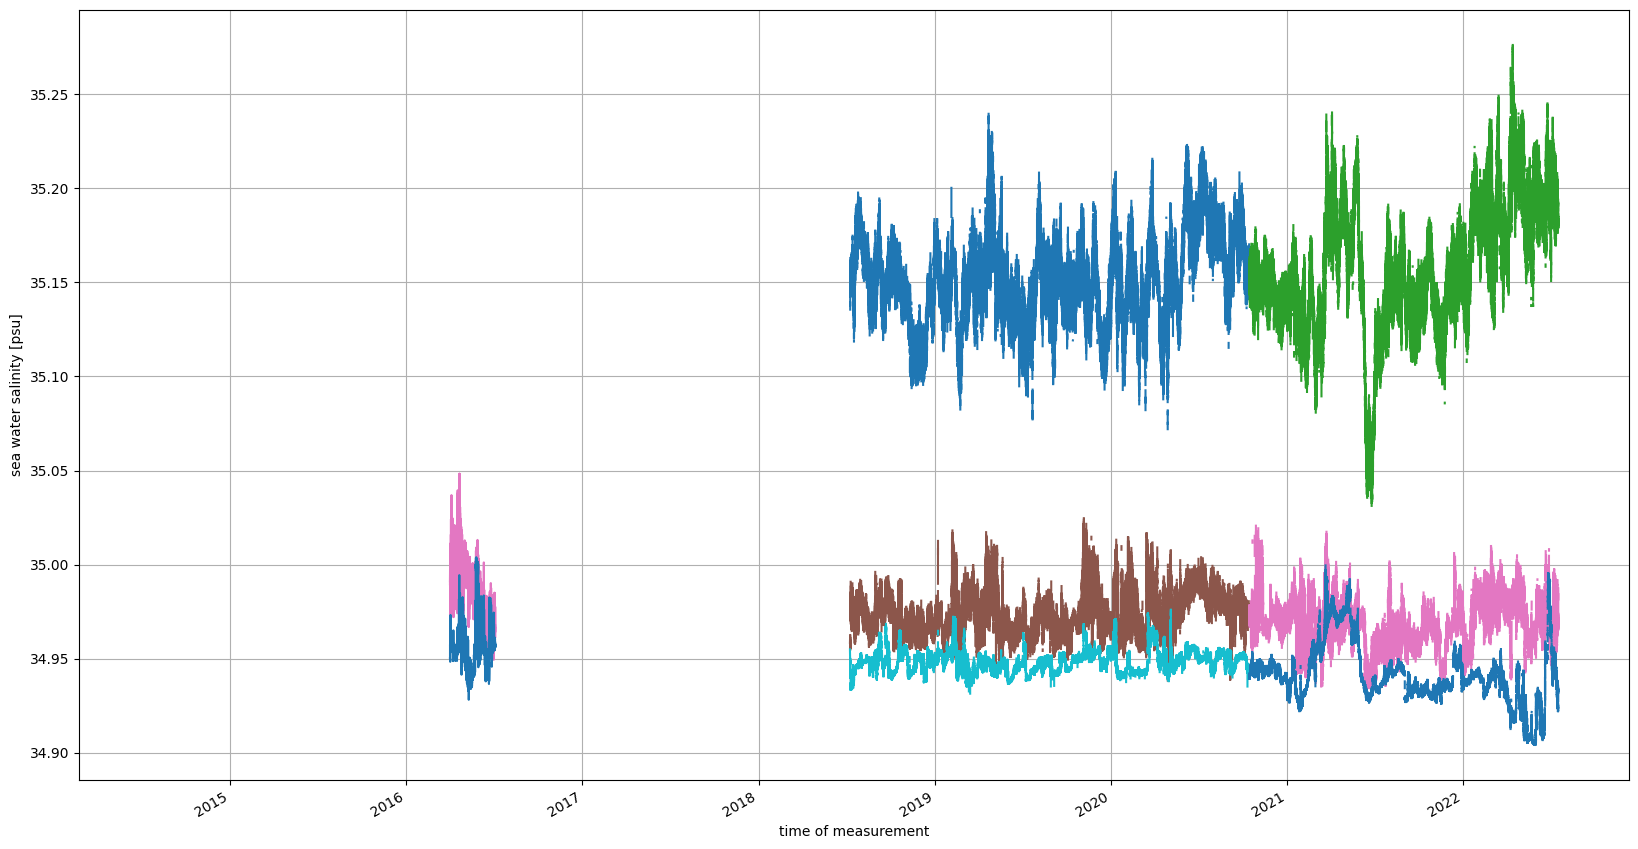

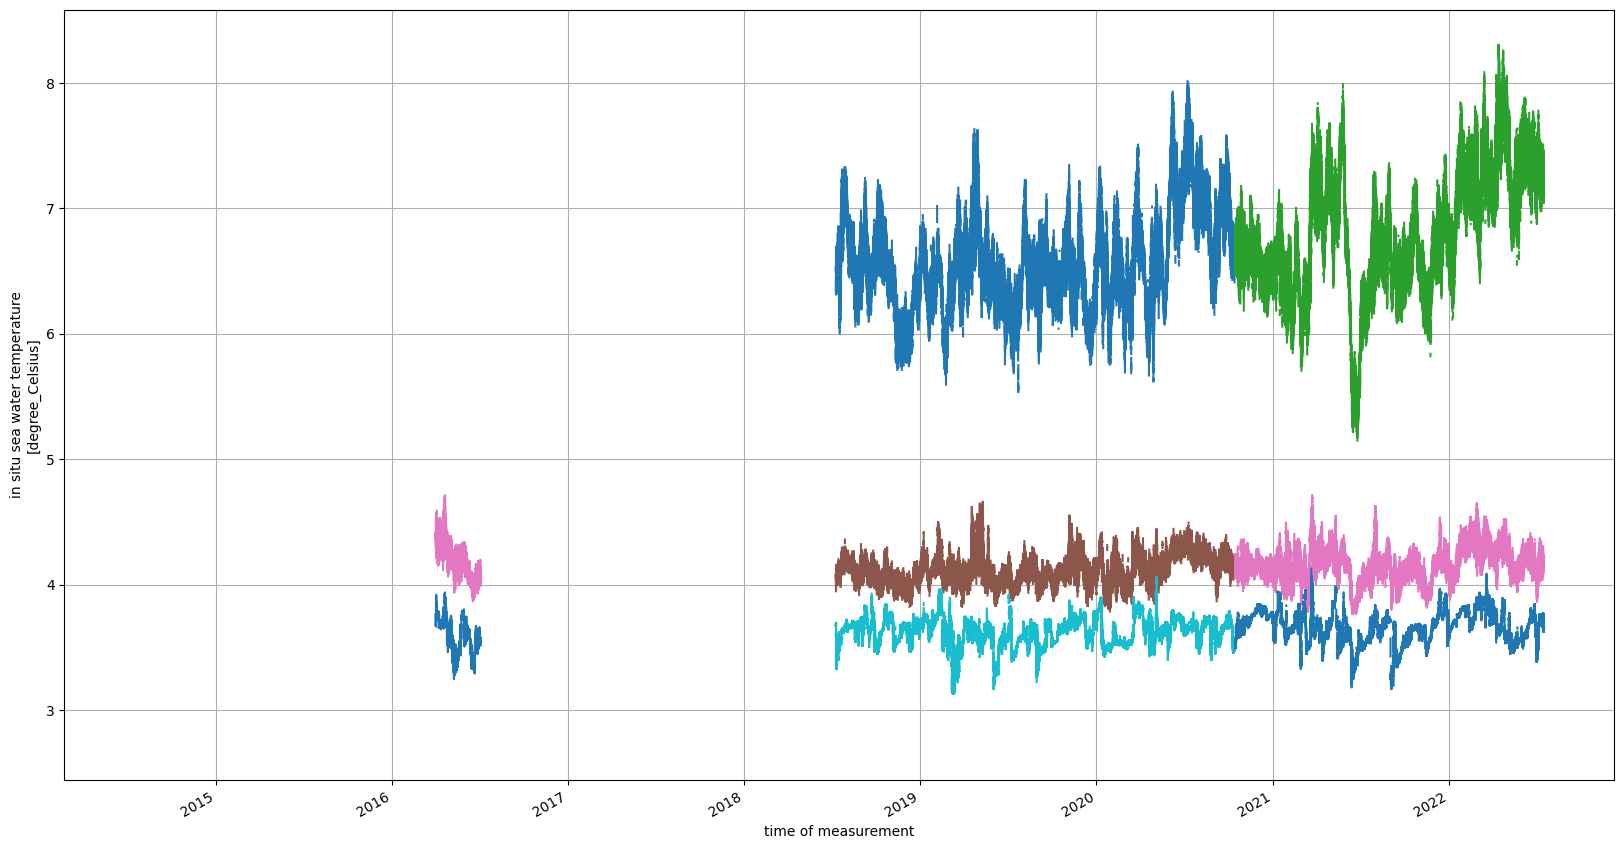

In [2]:
### global import and set paths
import os
import glob
import xarray as xr
import numpy as np
import datetime
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
from pathlib import Path

# set paths
indir='C:\\Users\\sa01ld\\m_moorproc_toolbox\\exec\\gitrepo\\export_Oceansites\\oceansites_format'
outdir='X:\\Marphys_Archive\\Data\\OSNAP\\THREDDS_DATA'

moorings=['RTEB1','RTWB1','RTWB2'
         ]
deployments=['01_2014','02_2015','03_2016','04_2017','05_2018','06_2020']

sensor='MCTD'

startdate='201407'# does not change!
enddate='202207'

## Begin loop
for numbmoor,moor in enumerate(moorings):
    ds=[]
    #make path to datafile
    outfile = os.path.join(outdir,'Rockall_Trough_mooring_'+moor+'_stacked_time_series_TSUV_'+startdate+'_'+enddate+'_v0.nc')
    
    # list the deployments from each mooring
    thisdeployemnt=deployments
    for num,deploy in enumerate(thisdeployemnt):
        # microcat files
        mctd_file=os.path.join(indir,moor+'*'+deploy +'*MCAT*')
        mc_fle=glob.glob(mctd_file)    
        # nortek current meters
        nor_file=os.path.join(indir,moor+'*'+deploy +'*Nortek*')
        nor_file=glob.glob(nor_file) 
        
        print('deployment '+deploy)      
        if mc_fle:
            # print data file name
            print(mc_fle[0])
            # open dataset as ds
            ds1=xr.open_dataset(nor_file[0])
            ds2=xr.open_dataset(mc_fle[0])
            # if there are duplicates, then drop the last one. The first is often the non-ODO microCAT
            # need to write a function here
            #  REMOVE DUPLICATES USING THE DEPTH DIMENSION
            ds2=ds2.drop_duplicates(dim="DEPTH", keep="first")
            ds=xr.merge([ds1,ds2])
            # ds=xr.open_dataset(mc_fle[0])    
            
        else:
            print('no microcat data from this deployment')
            break 
        if num==0:
            dfmerge=ds
        else:
            dfmerge=xr.merge([dfmerge,ds])

        dfmerge.to_netcdf(outfile) 
        print(' data from this deployment are saved at ' + outfile)
        
    dfmerge.PRES.plot.line(x='TIME',aspect=2, size=10,add_legend=False)
    plt.gca().invert_yaxis()
    plt.grid()

    dfmerge.PSAL.plot.line(x='TIME',aspect=2, size=10,add_legend=False)
    plt.grid()

    dfmerge.TEMP.plot.line(x='TIME',aspect=2, size=10,add_legend=False)
    plt.grid()


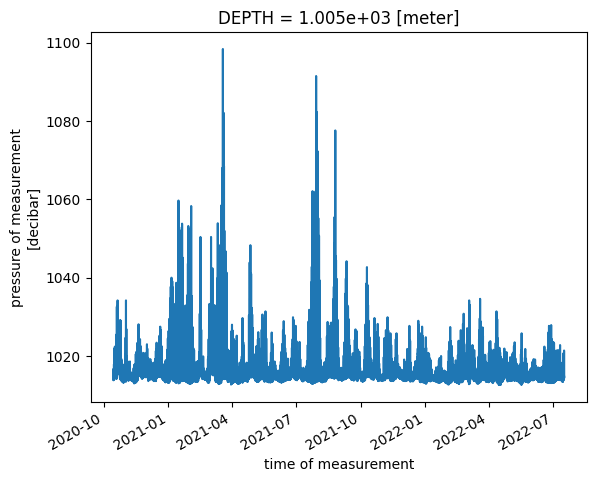

In [6]:
dfmerge.PRES.isel(DEPTH=1).plot()
